In [ ]:
pip install anndata

In [ ]:
pip install --upgrade pandas


In [ ]:

pip install scanpy

In [ ]:
pip install igraph

In [ ]:
pip install leidenalg

In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/ya.yaghooti@gmail.com')

In [ ]:
adata = sc.read('/ya.yaghooti@gmail.com/MyDrive/F1L_compbio_internship/outs/240701_kinker_anndata_preprocessed.h5ad')

In [ ]:
adata.layers['counts'] = adata.X.copy()
#normalization
sc.pp.normalize_total(adata, target_sum=1e4)
#scaling
sc.pp.log1p(adata)
#run with TPU
#adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

Things to test: cell metabolic rates, hypoxia, expression of HIF1alpha and genes downstream of HIF1alpha (HIF1alpha high expression means more VEGF production and susceptibility to Bevacizumab)

Plan: VEGFA and HIF1alpha expression, pathway enrichment analysis to test which cell lines have higher metabolic rates and are expressing genes related to hypoxia.

In [ ]:
genes=["VEGFA", "VEGFB", "HIF1A"]
df = sc.get.obs_df(adata, keys=genes)
df['Indication'] = adata.obs['Indication']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


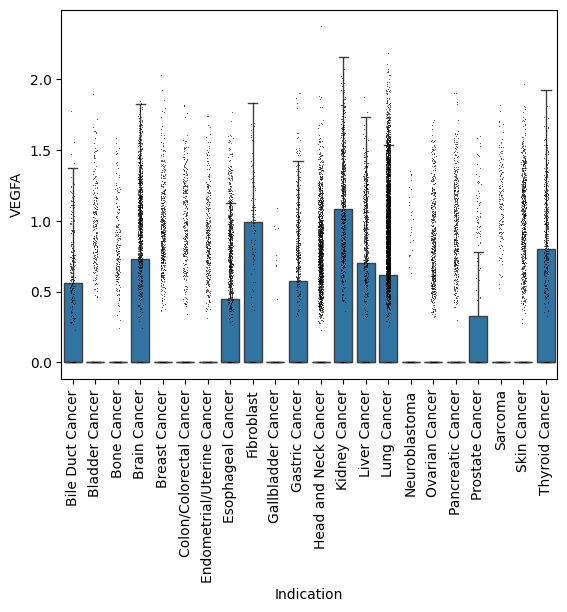

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


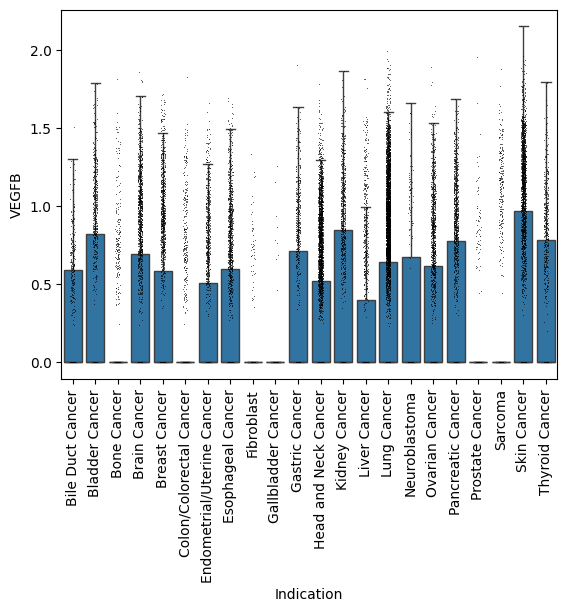

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


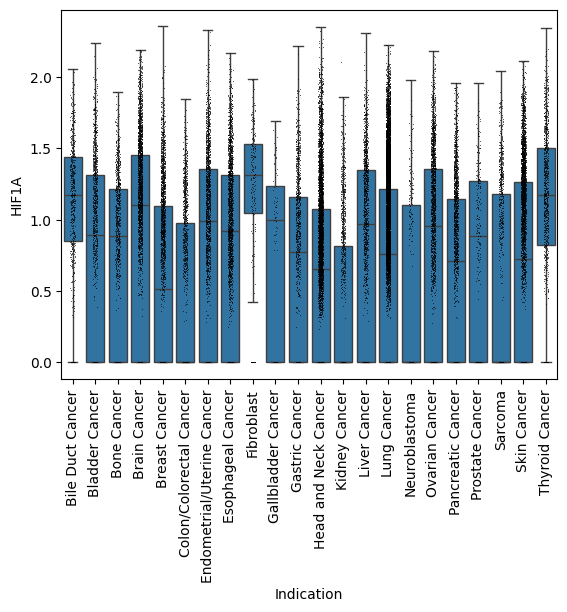

In [ ]:
for i, gene in enumerate(genes):
  #axs[i].tick_params(axis='x', labelrotation=90)
  x = sns.boxplot(
    data=df,
    x='Indication',
    y=gene,
    showfliers=False,
    #ax=axs[i]
    )

  x = sns.stripplot(
    data=df,
    x='Indication',
    y=gene,
    color='black',
    size=0.5,
    jitter=True,
    #ax=axs[i]
    )
  x.tick_params(axis='x', labelrotation=90)
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

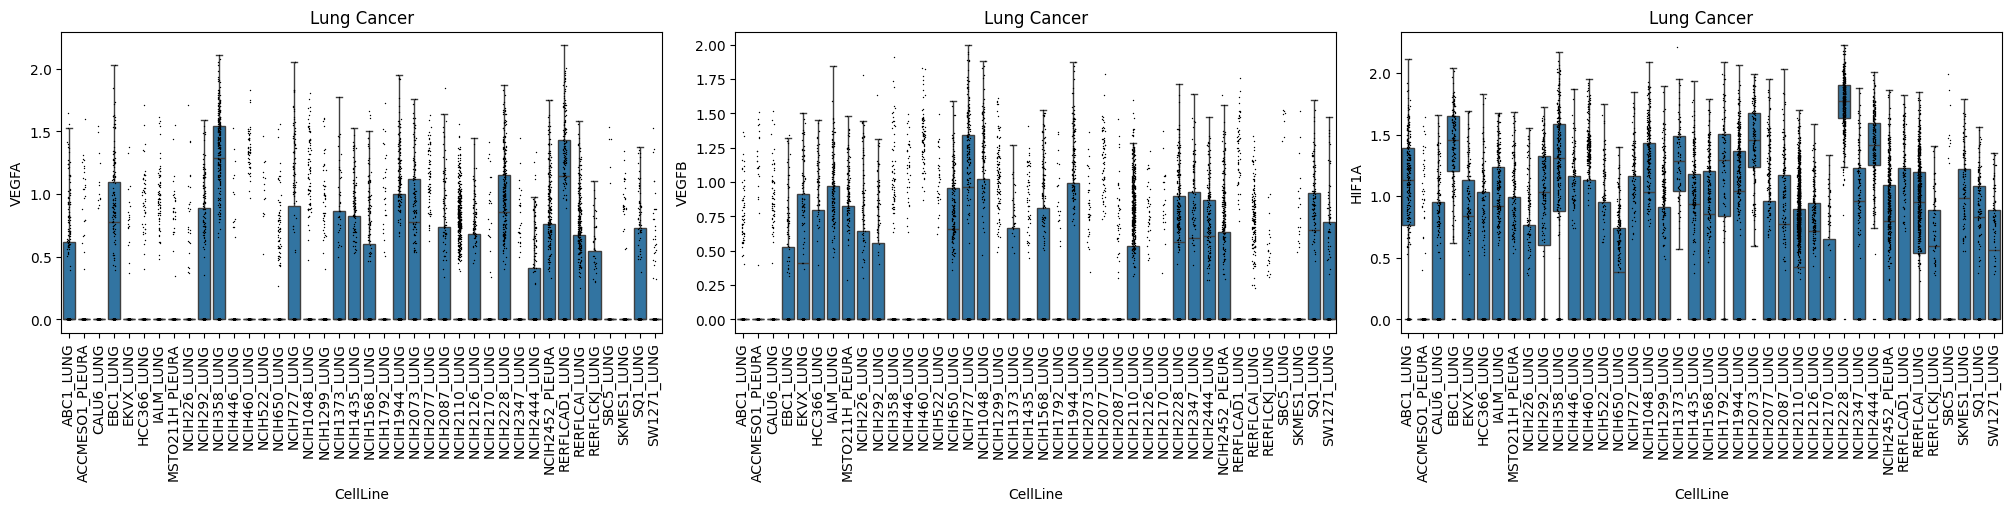

In [ ]:
adata_lung = adata[adata.obs.Indication=="Lung Cancer"].copy()
df = sc.get.obs_df(adata_lung, keys=genes)
df["CellLine"] = adata_lung.obs.CellLine

fig, axs = plt.subplots(1, len(genes), figsize=(20,5), layout="constrained")
for i in range(len(genes)):
  axs[i] = sns.boxplot(
    data=df,
    x="CellLine",
    y=genes[i],
    showfliers=False,
    ax=axs[i],
  )

  axs[i] = sns.stripplot(
    data=df,
    x="CellLine",
    y=genes[i],
    color="black",
    size=1,
    jitter=True,
    ax=axs[i],
  )

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title("Lung Cancer")


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

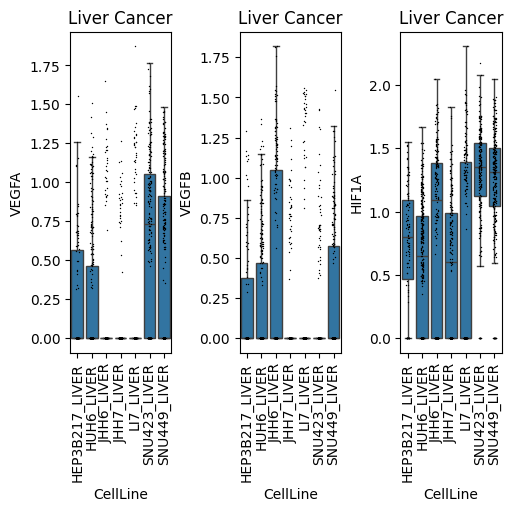

In [ ]:
adata_liver = adata[adata.obs.Indication=="Liver Cancer"].copy()
df = sc.get.obs_df(adata_liver, keys=genes)
df["CellLine"] = adata_liver.obs.CellLine

fig, axs = plt.subplots(1, len(genes), figsize=(5,5), layout="constrained")
for i in range(len(genes)):
  axs[i] = sns.boxplot(
    data=df,
    x="CellLine",
    y=genes[i],
    showfliers=False,
    ax=axs[i],
  )

  axs[i] = sns.stripplot(
    data=df,
    x="CellLine",
    y=genes[i],
    color="black",
    size=1,
    jitter=True,
    ax=axs[i],
  )

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title("Liver Cancer")


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

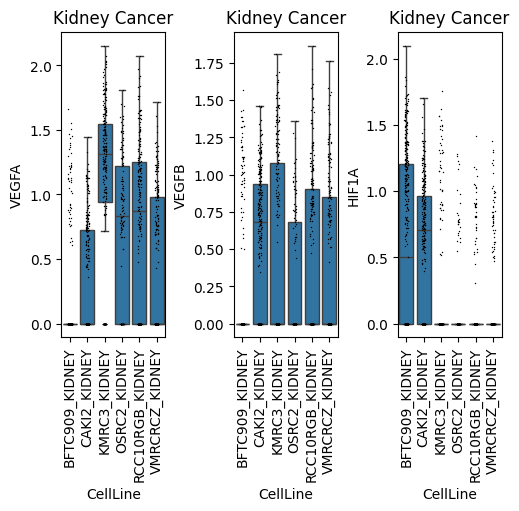

In [ ]:
adata_kidney = adata[adata.obs.Indication=="Kidney Cancer"].copy()
df = sc.get.obs_df(adata_kidney, keys=genes)
df["CellLine"] = adata_kidney.obs.CellLine

fig, axs = plt.subplots(1, len(genes), figsize=(5,5), layout="constrained")
for i in range(len(genes)):
  axs[i] = sns.boxplot(
    data=df,
    x="CellLine",
    y=genes[i],
    showfliers=False,
    ax=axs[i],
  )

  axs[i] = sns.stripplot(
    data=df,
    x="CellLine",
    y=genes[i],
    color="black",
    size=1,
    jitter=True,
    ax=axs[i],
  )

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title("Kidney Cancer")


plt.show()
#VEGF expression can occur in the absence of HIF

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

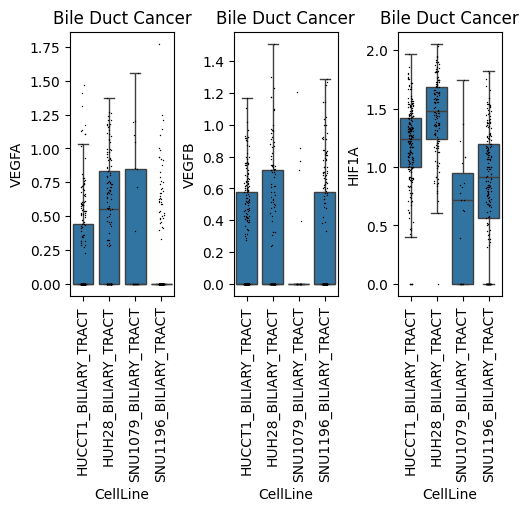

In [ ]:
adata_bile_duct = adata[adata.obs.Indication=="Bile Duct Cancer"].copy()
df = sc.get.obs_df(adata_bile_duct, keys=genes)
df["CellLine"] = adata_bile_duct.obs.CellLine

fig, axs = plt.subplots(1, len(genes), figsize=(5,5), layout="constrained")
for i in range(len(genes)):
  axs[i] = sns.boxplot(
    data=df,
    x="CellLine",
    y=genes[i],
    showfliers=False,
    ax=axs[i],
  )

  axs[i] = sns.stripplot(
    data=df,
    x="CellLine",
    y=genes[i],
    color="black",
    size=1,
    jitter=True,
    ax=axs[i],
  )

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title("Bile Duct Cancer")


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

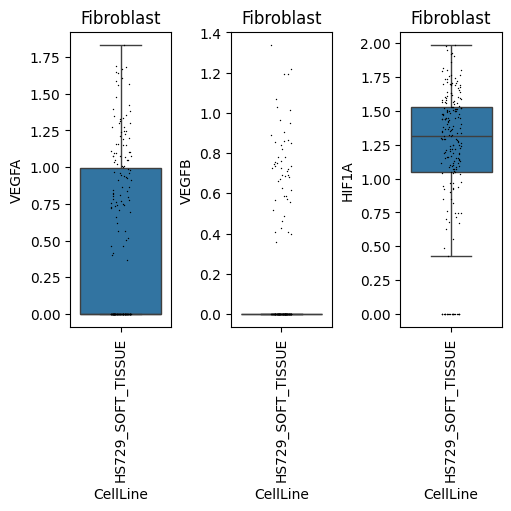

In [ ]:
adata_fibroblast = adata[adata.obs.Indication=="Fibroblast"].copy()
df = sc.get.obs_df(adata_fibroblast, keys=genes)
df["CellLine"] = adata_fibroblast.obs.CellLine

fig, axs = plt.subplots(1, len(genes), figsize=(5,5), layout="constrained")

for i in range(len(genes)):
  axs[i] = sns.boxplot(
    data=df,
    x="CellLine",
    y=genes[i],
    showfliers=False,
    ax=axs[i],
  )

  axs[i] = sns.stripplot(
    data=df,
    x="CellLine",
    y=genes[i],
    color="black",
    size=1,
    jitter=True,
    ax=axs[i],
  )

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title("Fibroblast")


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

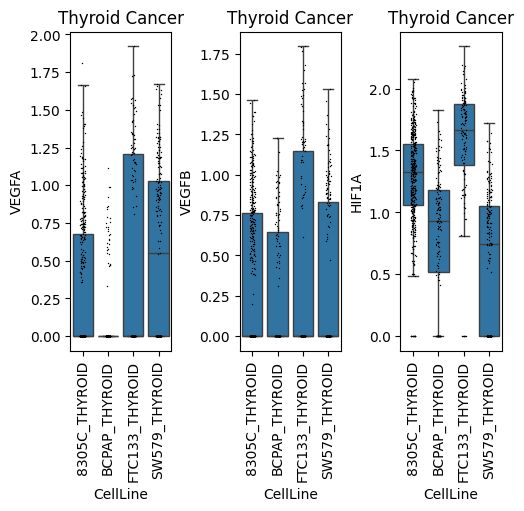

In [ ]:
adata_thyroid = adata[adata.obs.Indication=="Thyroid Cancer"].copy()
df = sc.get.obs_df(adata_thyroid, keys=genes)
df["CellLine"] = adata_thyroid.obs.CellLine

fig, axs = plt.subplots(1, len(genes), figsize=(5,5), layout="constrained")

for i in range(len(genes)):
  axs[i] = sns.boxplot(
    data=df,
    x="CellLine",
    y=genes[i],
    showfliers=False,
    ax=axs[i],
  )

  axs[i] = sns.stripplot(
    data=df,
    x="CellLine",
    y=genes[i],
    color="black",
    size=1,
    jitter=True,
    ax=axs[i],
  )

for ax in axs:
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title("Thyroid Cancer")


plt.show()

In [ ]:
def run_leiden(data):
  sc.pp.neighbors(data, n_pcs=40)
  sc.tl.umap(data)
  sc.tl.leiden(data, key_added="leiden_0.25", resolution=0.25)
  sc.tl.leiden(data, key_added="leiden_0.5", resolution=0.5)
  sc.tl.leiden(data, key_added="leiden_0.75", resolution=0.75)
  sc.tl.leiden(data, key_added="leiden_1", resolution=1)

run_leiden(adata_lung)
run_leiden(adata_kidney)
run_leiden(adata_liver)
run_leiden(adata_thyroid)
run_leiden(adata_bile_duct)
run_leiden(adata_fibroblast)

<ipython-input-18-0c7d29e3ce4a>:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data, key_added="leiden_0.25", resolution=0.25)


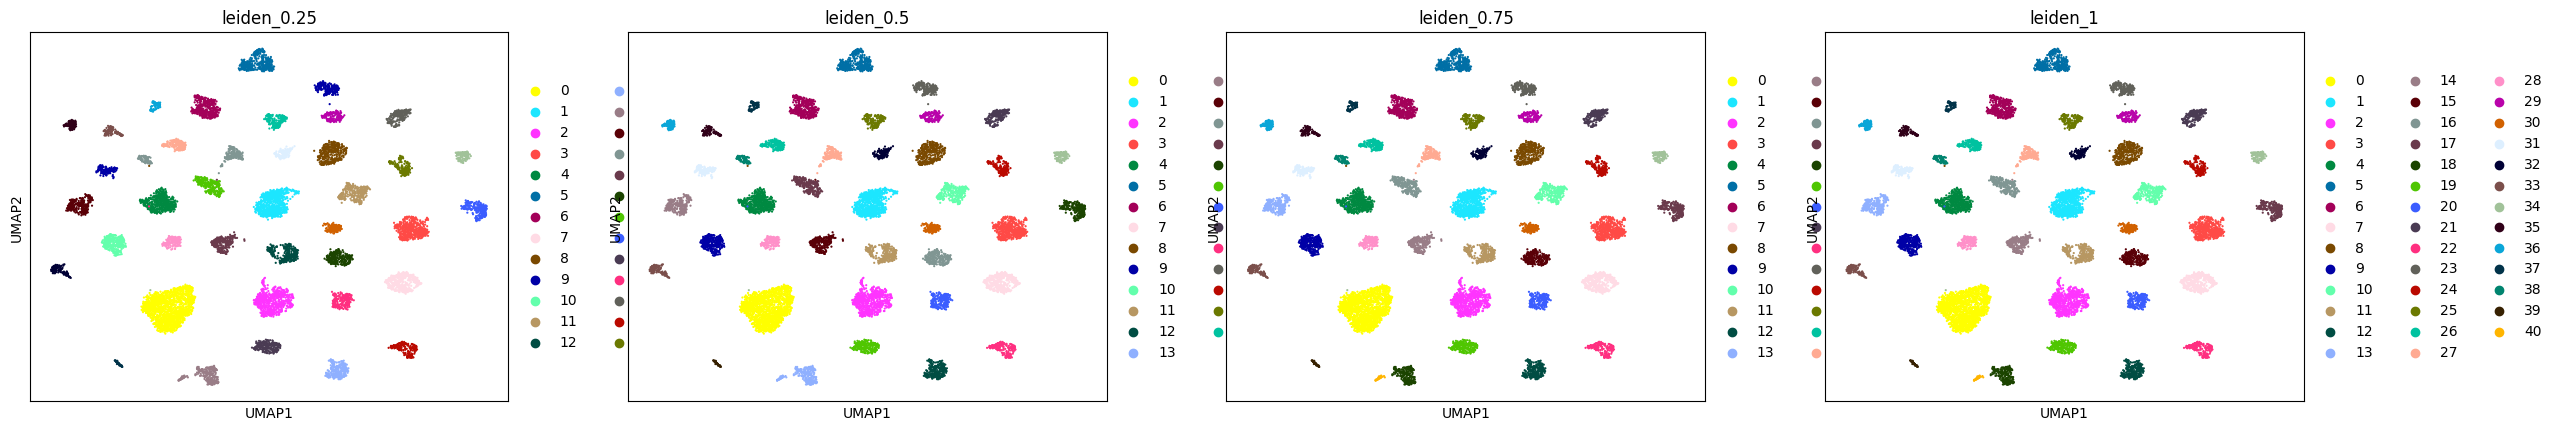

In [ ]:
sc.pl.umap(adata_lung, color=["leiden_0.25", "leiden_0.5", "leiden_0.75", "leiden_1"])
#resolution 0.5 seems ok

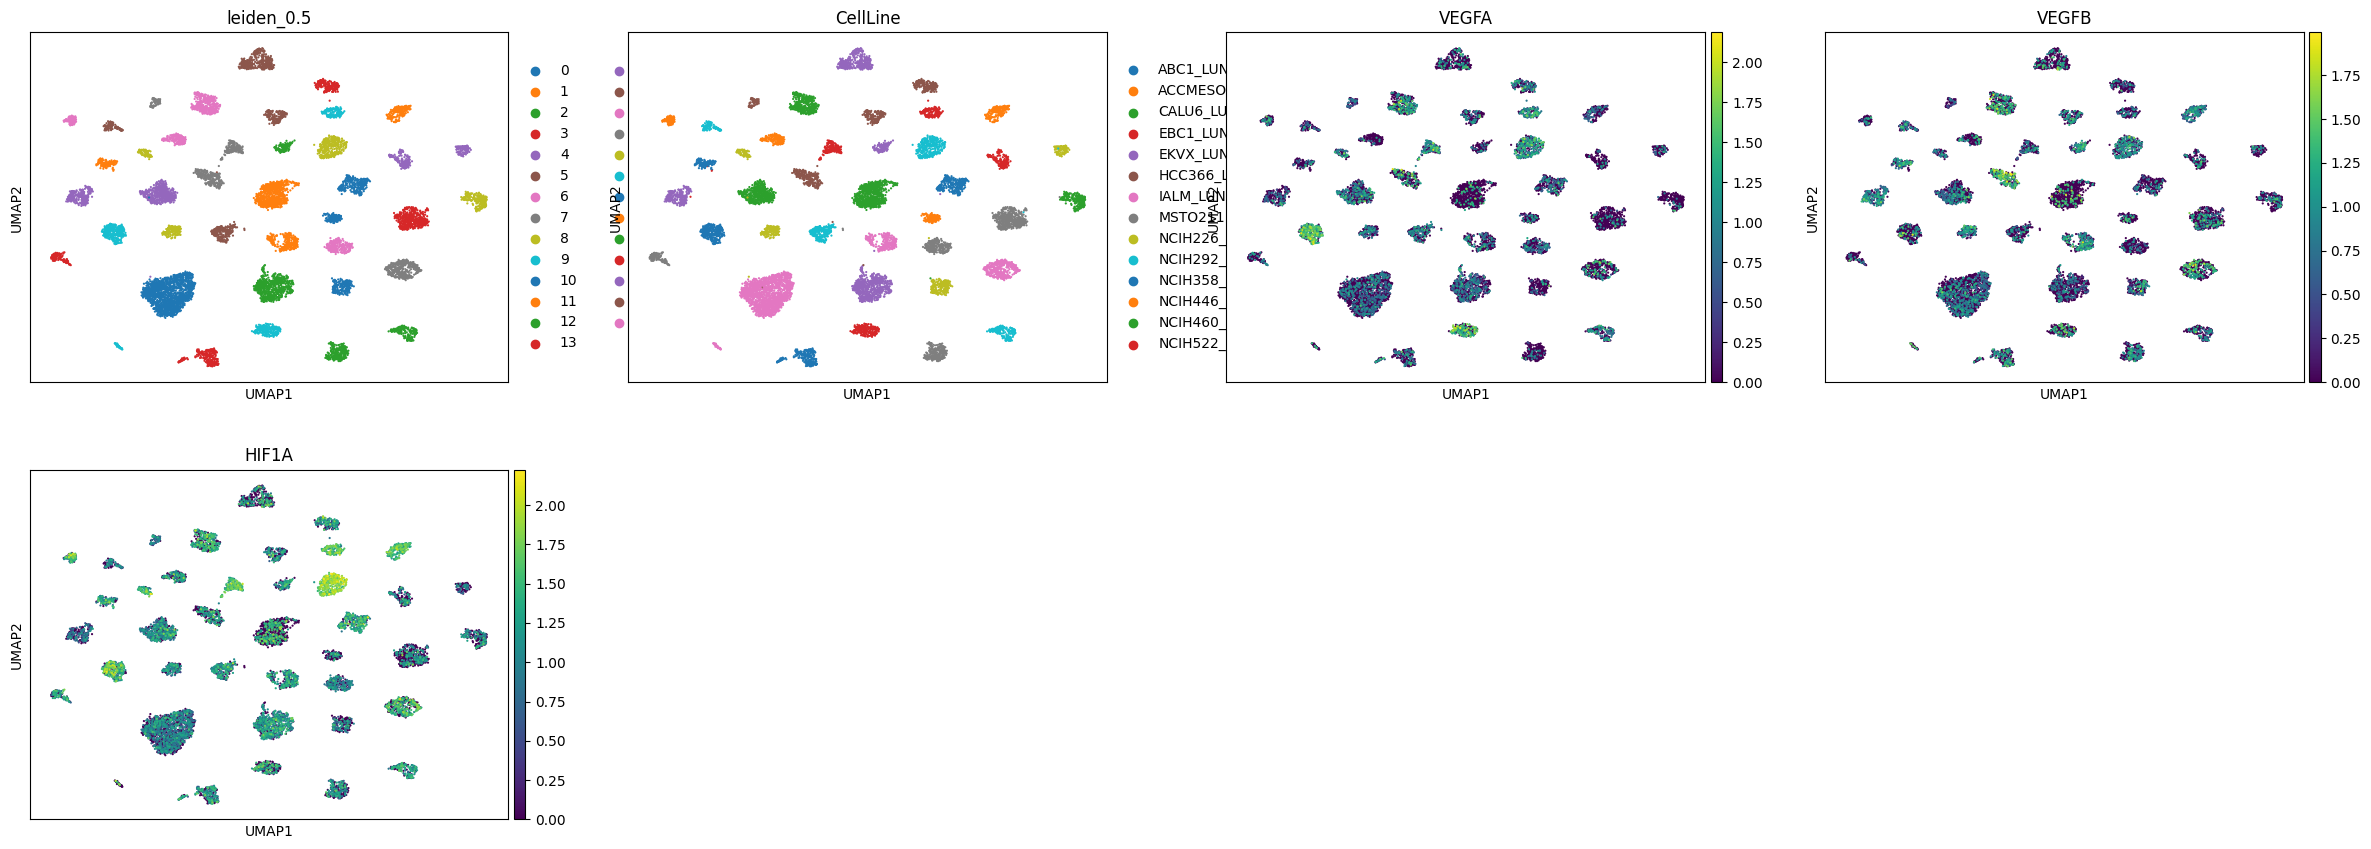

In [ ]:
sc.pl.umap(adata_lung, color=["leiden_0.5", "CellLine", "VEGFA", "VEGFB", "HIF1A"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))


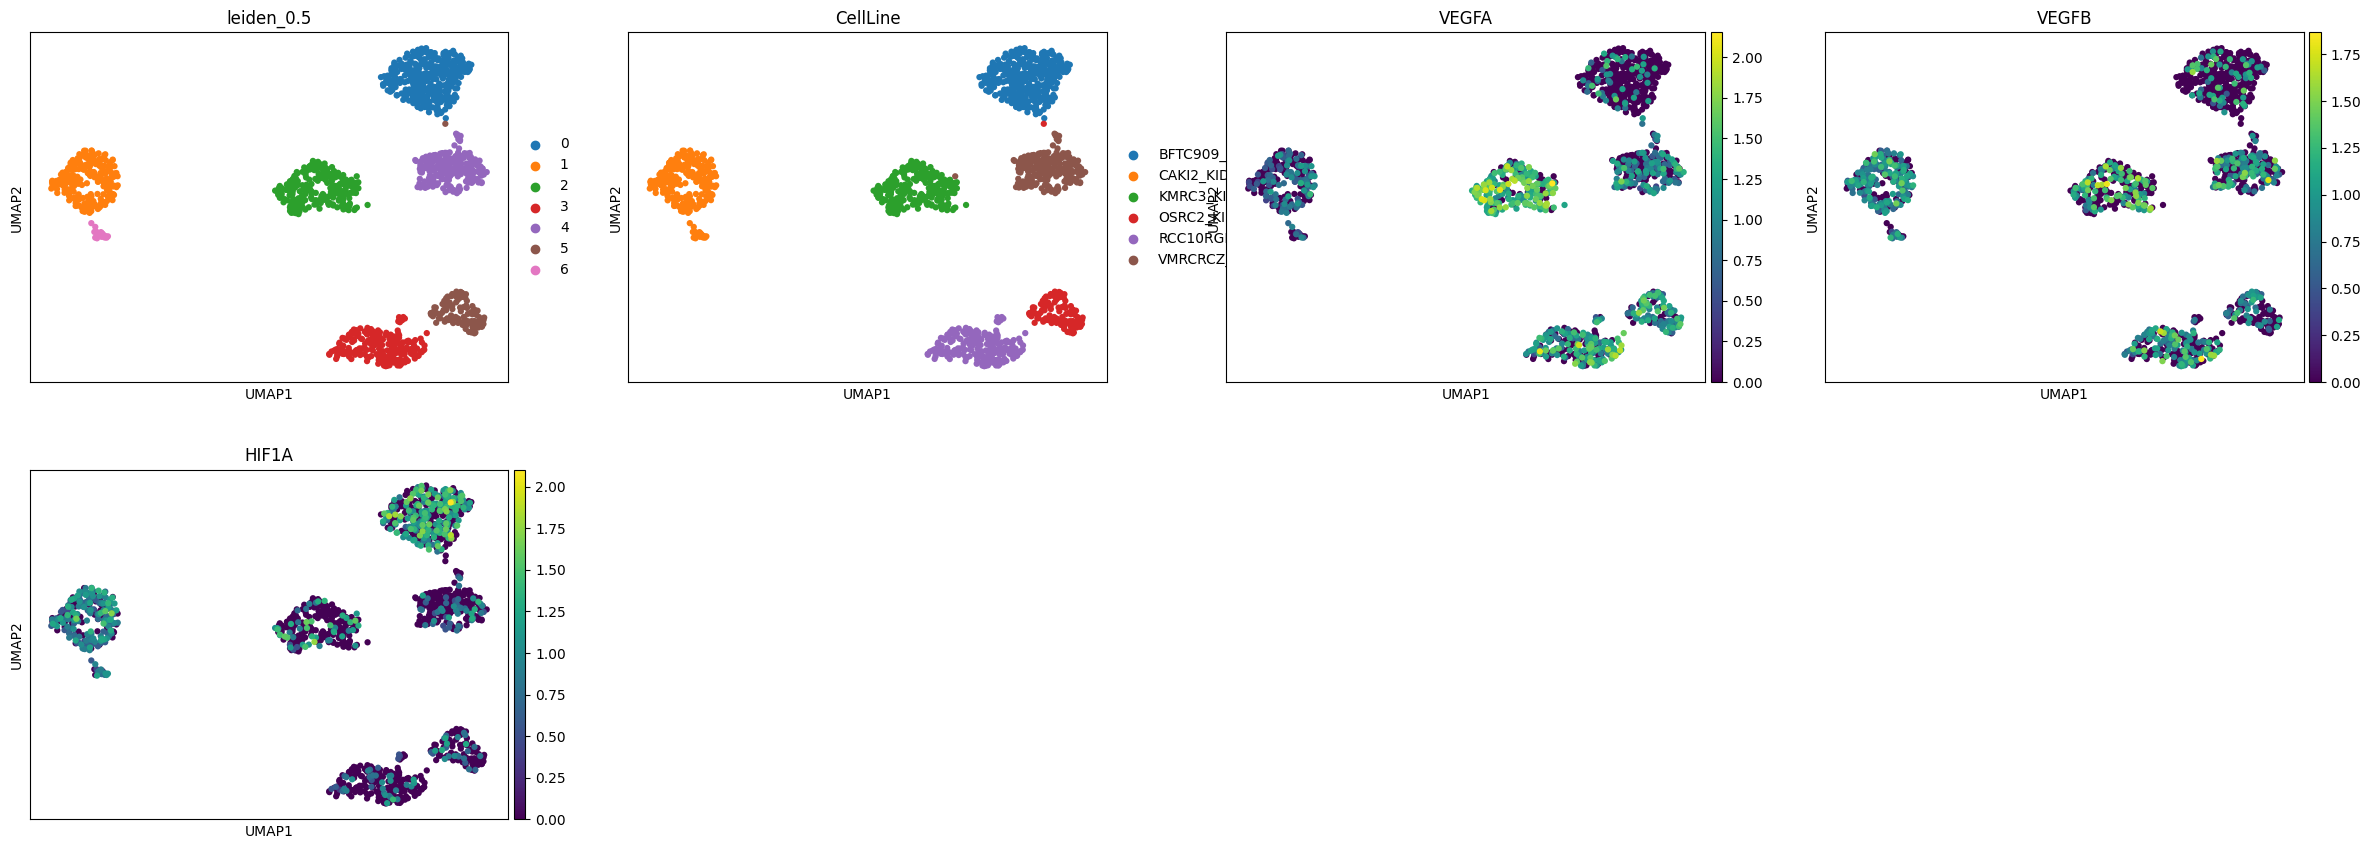

In [ ]:
sc.pl.umap(adata_kidney, color=["leiden_0.5", "CellLine", "VEGFA", "VEGFB", "HIF1A"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

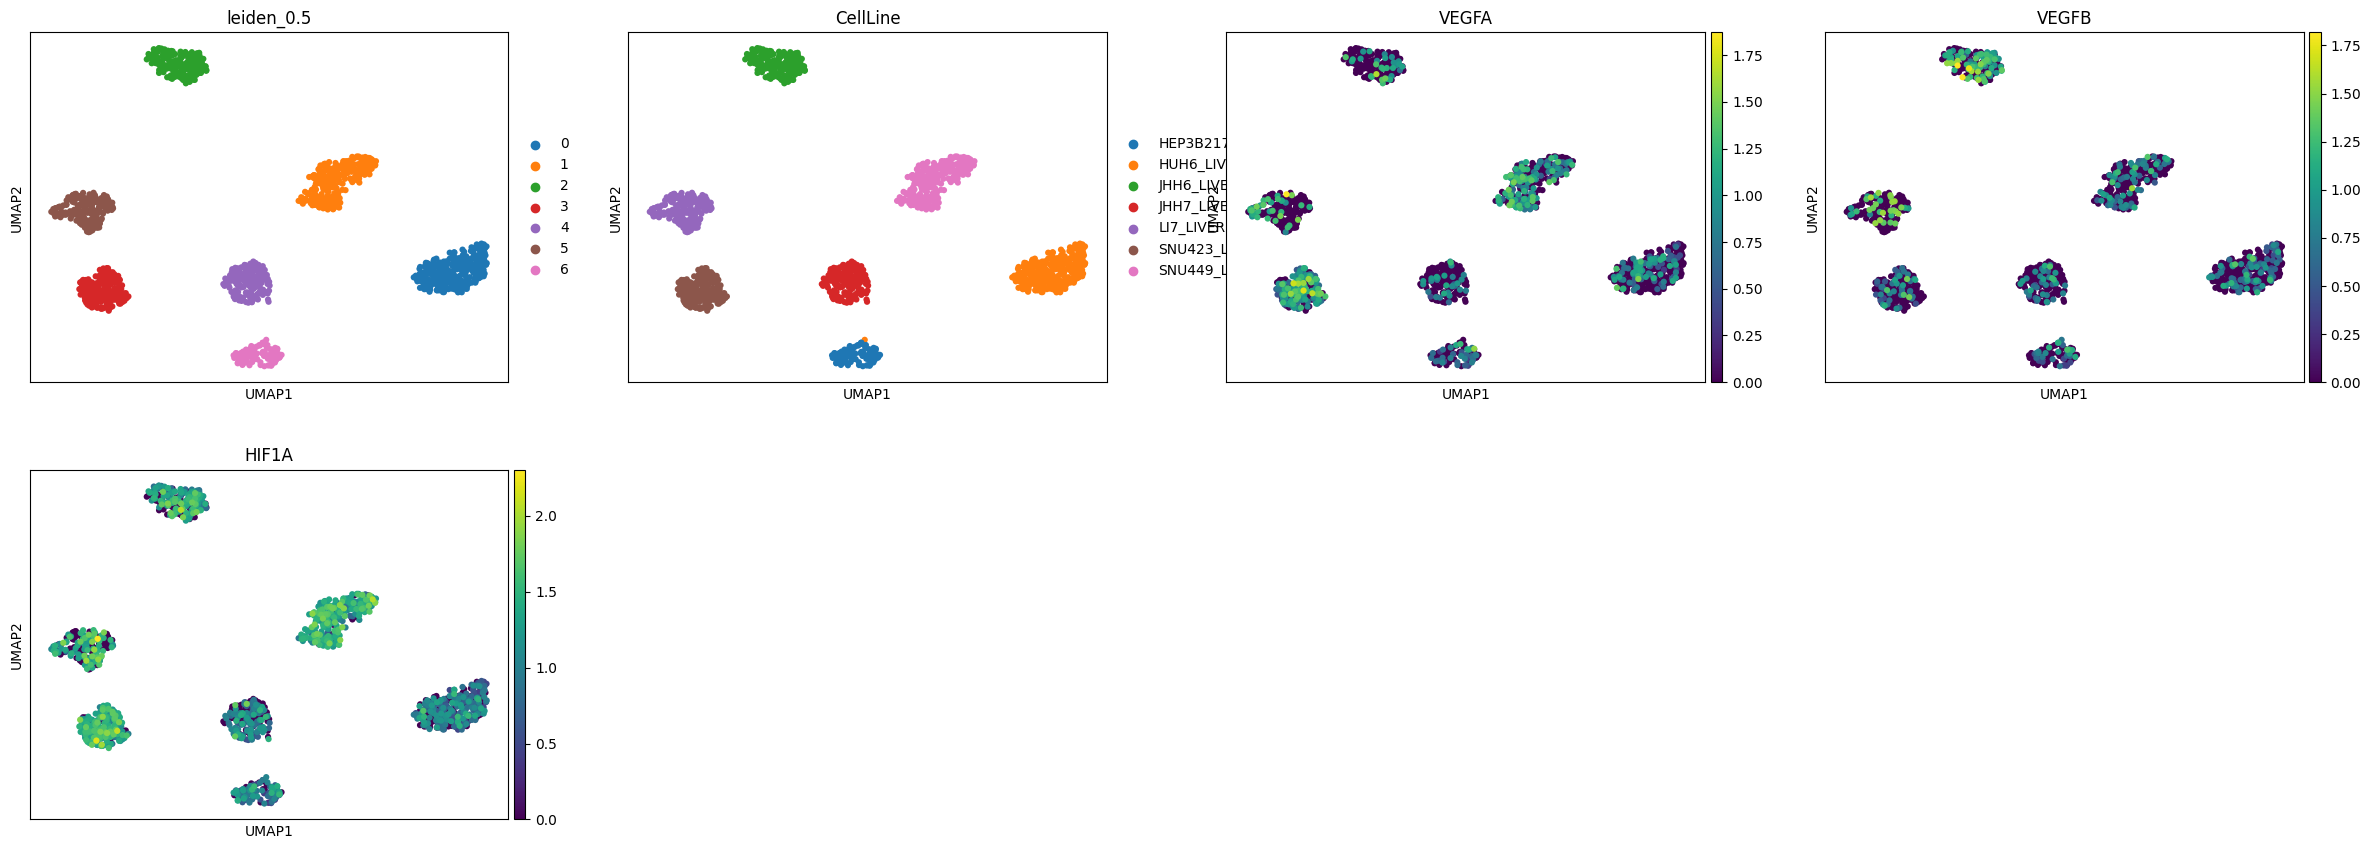

In [ ]:
sc.pl.umap(adata_liver, color=["leiden_0.5", "CellLine", "VEGFA", "VEGFB", "HIF1A"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

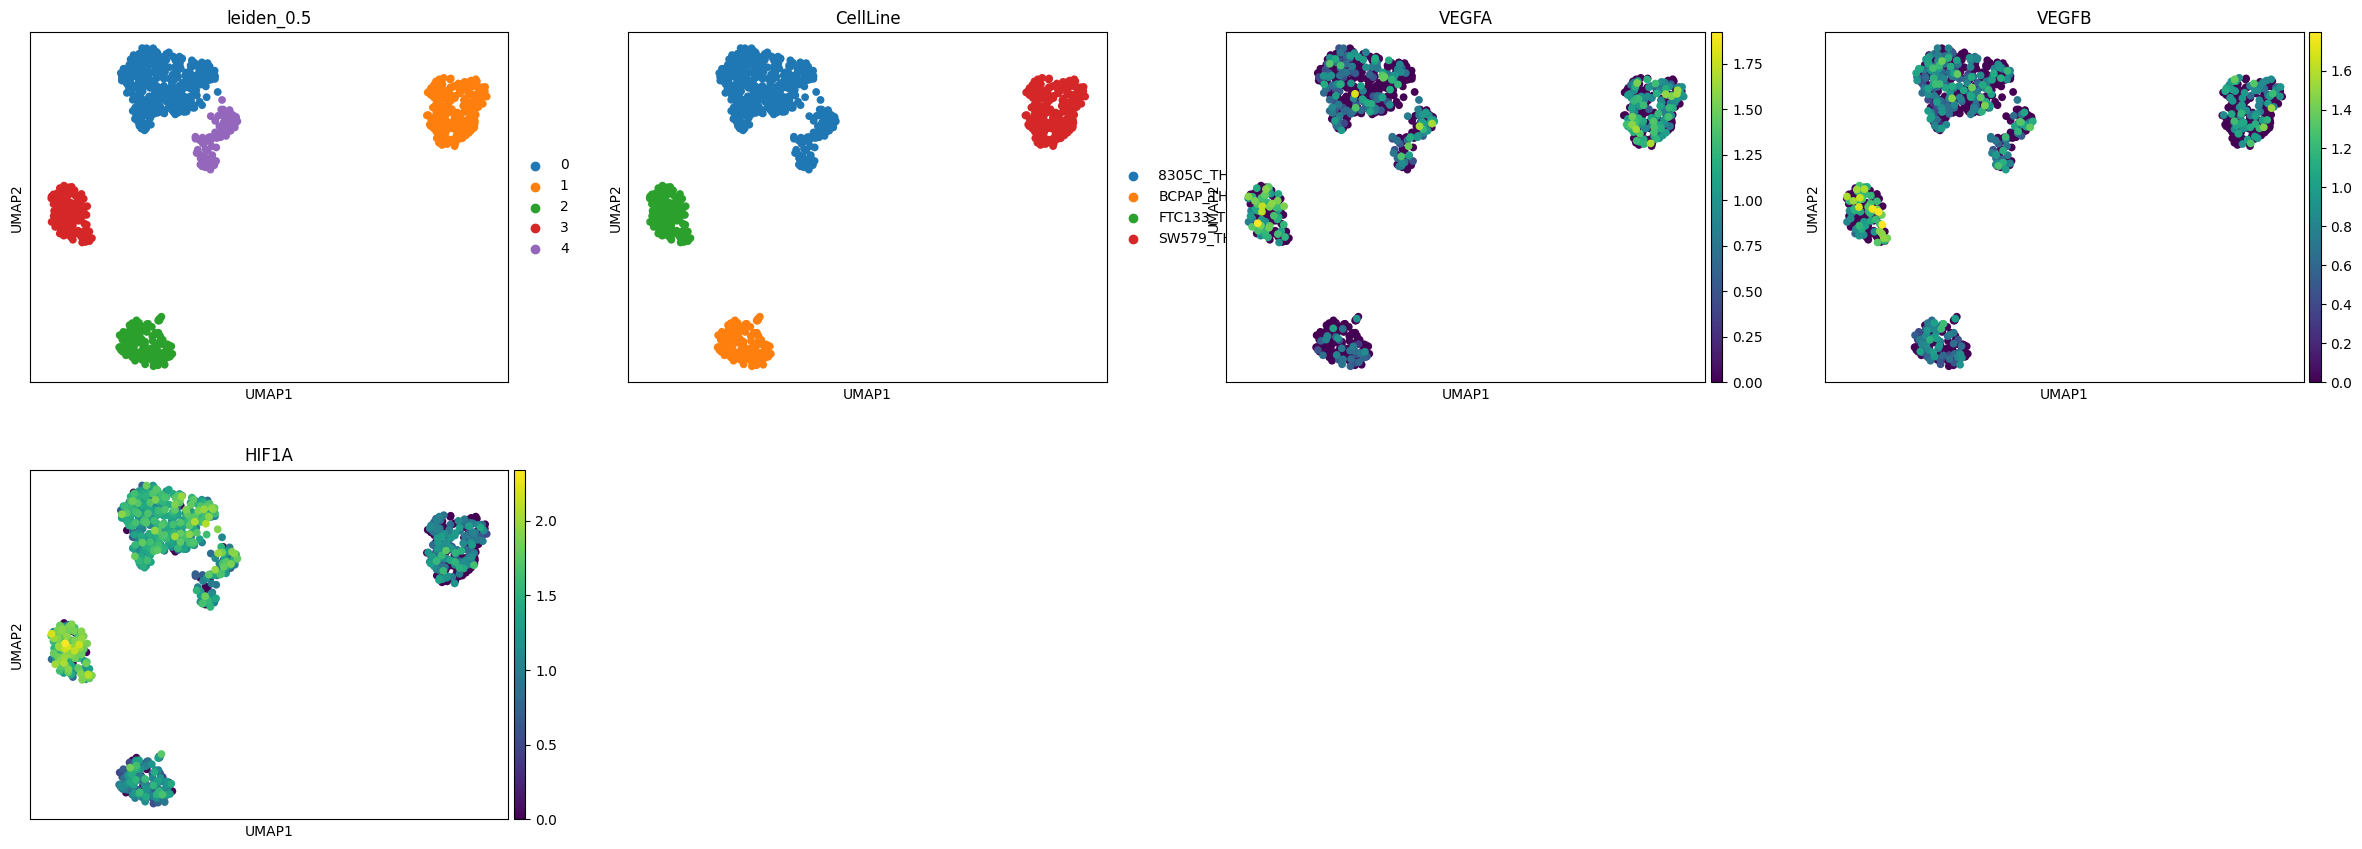

In [ ]:
sc.pl.umap(adata_thyroid, color=["leiden_0.5", "CellLine", "VEGFA", "VEGFB", "HIF1A"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))


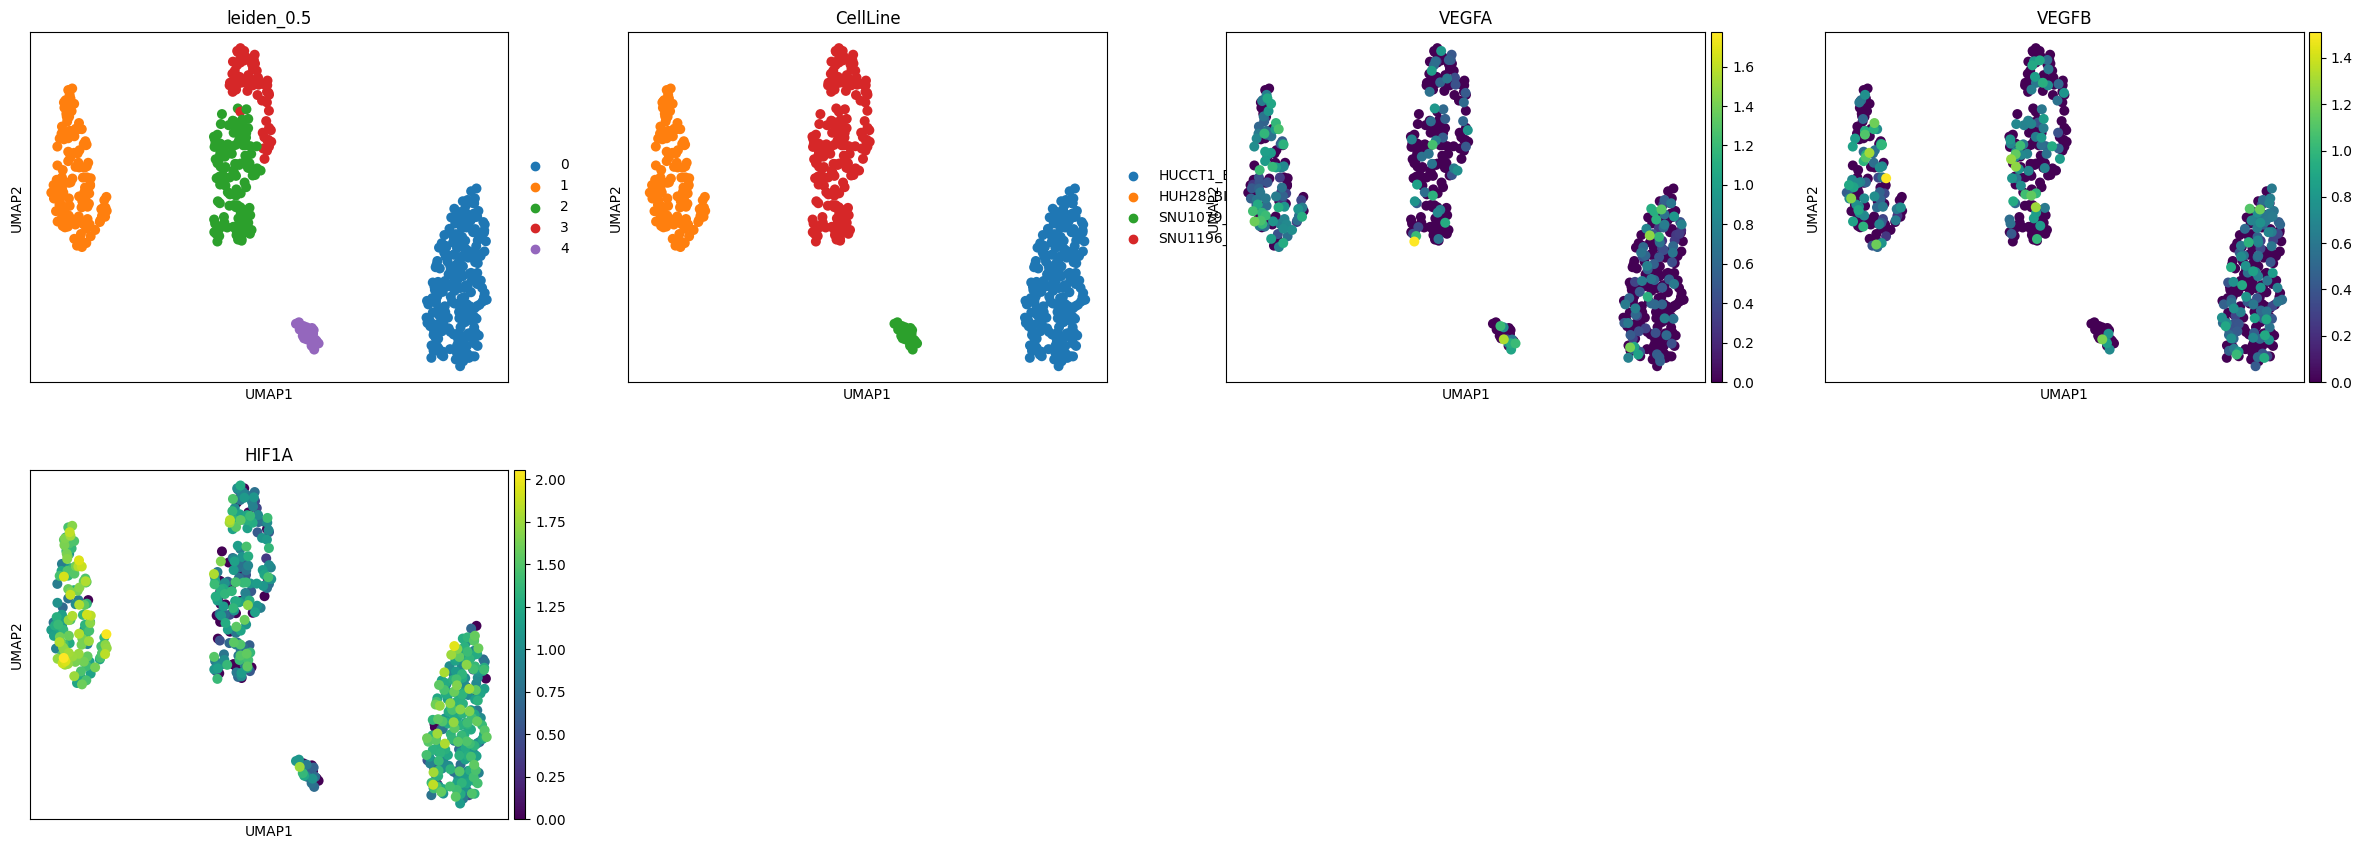

In [ ]:
sc.pl.umap(adata_bile_duct, color=["leiden_0.5", "CellLine", "VEGFA", "VEGFB", "HIF1A"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))


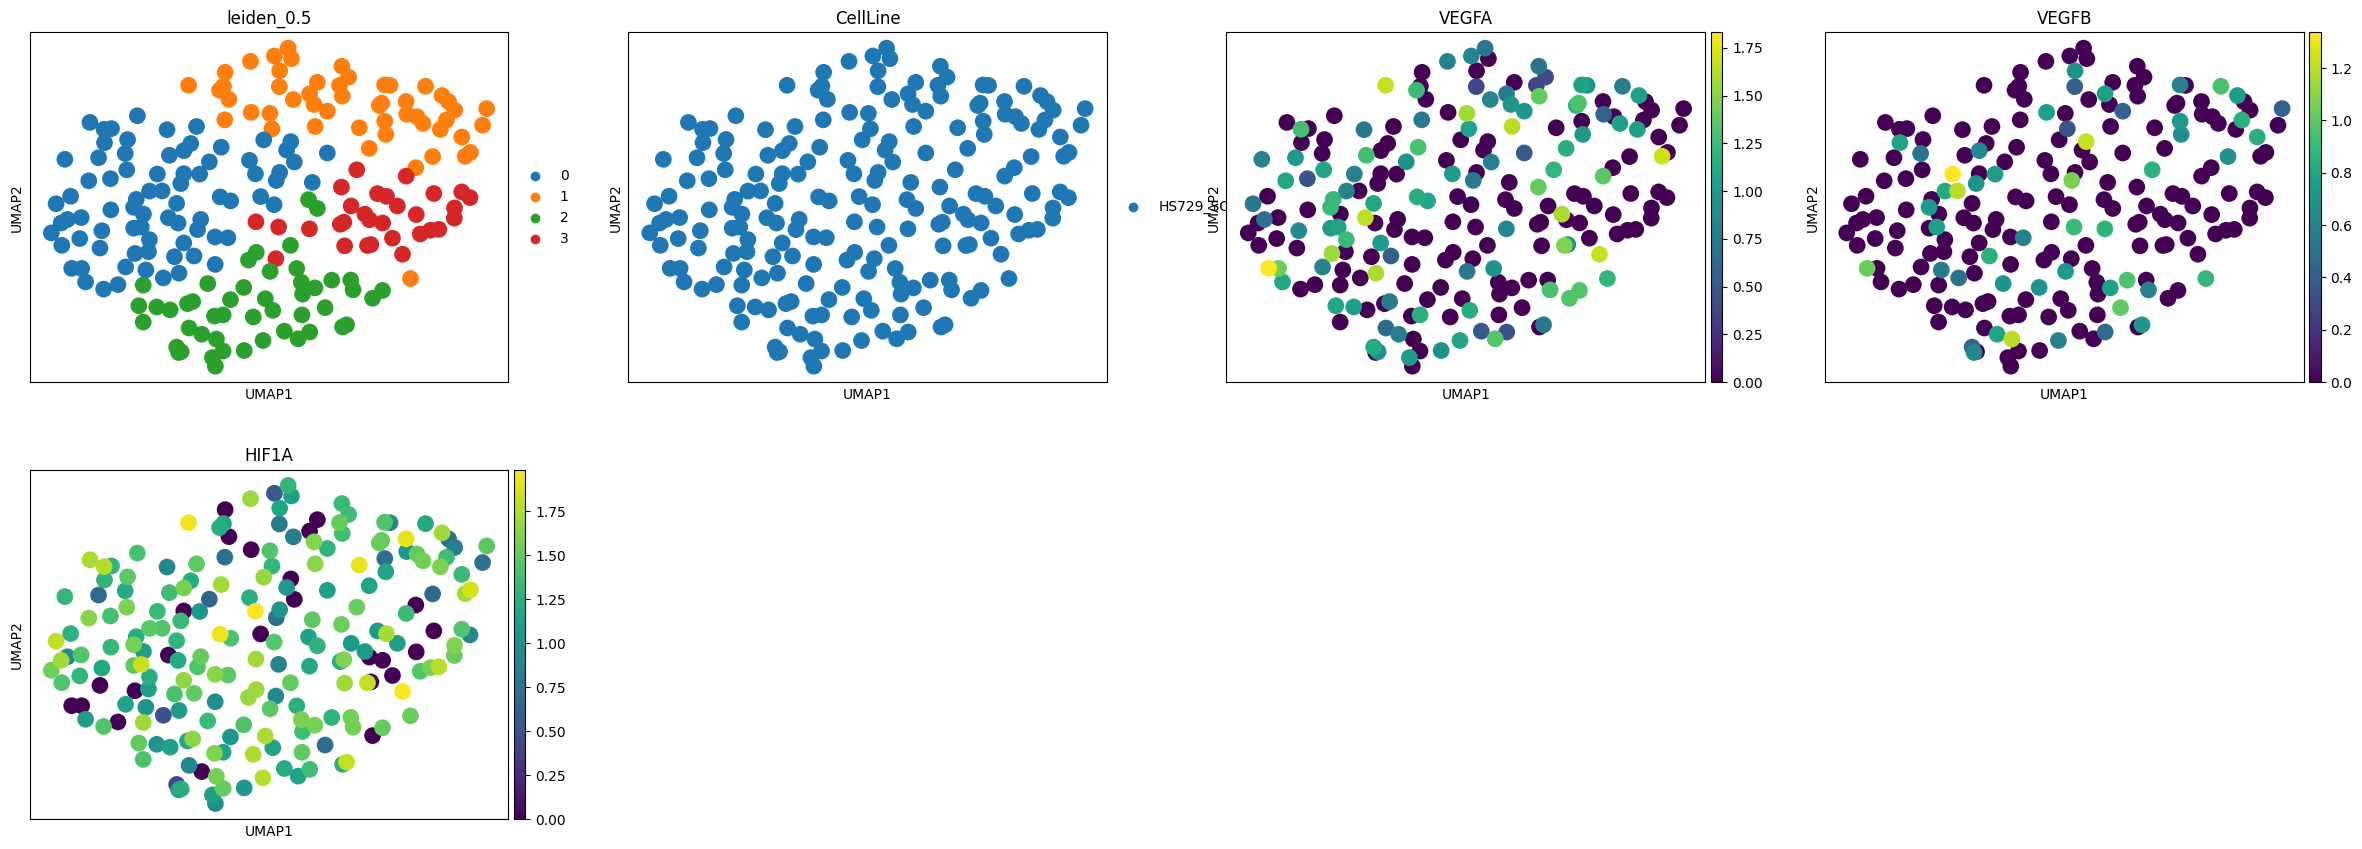

In [ ]:
sc.pl.umap(adata_fibroblast, color=["leiden_0.5", "CellLine", "VEGFA", "VEGFB", "HIF1A"], palette=list(matplotlib.colors.TABLEAU_COLORS.values()))

To do enrichment analysis, we need to first identify DEGs bu that requires us to have control groups and compare with that; which we don't.
A method we can use is pathway activity inference and an example tool is decouplR implemented in python.

In [ ]:
pip install decoupler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
import decoupler as dc

In [ ]:
pip install omnipath

In [ ]:
#get MSigDB functional terms
msigdb = dc.get_resource('MSigDB')

In [ ]:
msigdb.columns

Index(['genesymbol', 'collection', 'geneset'], dtype='object')

In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

In [ ]:
dc.run_ora(
    mat=adata,
    net=msigdb,
    source='geneset',
    target='genesymbol',
    use_raw=False,
    verbose=True
)

Running ora on mat with 49707 samples and 22939 targets for 50 sources.


  0%|          | 0/49707 [00:00<?, ?it/s]

In [ ]:
all_gene_sets = adata.obsm['ora_estimate'].columns

In [ ]:
all_gene_sets

CategoricalIndex([                     'HALLMARK_ADIPOGENESIS',
                                'HALLMARK_ALLOGRAFT_REJECTION',
                                  'HALLMARK_ANDROGEN_RESPONSE',
                                       'HALLMARK_ANGIOGENESIS',
                                    'HALLMARK_APICAL_JUNCTION',
                                     'HALLMARK_APICAL_SURFACE',
                                          'HALLMARK_APOPTOSIS',
                               'HALLMARK_BILE_ACID_METABOLISM',
                            'HALLMARK_CHOLESTEROL_HOMEOSTASIS',
                                        'HALLMARK_COAGULATION',
                                         'HALLMARK_COMPLEMENT',
                                         'HALLMARK_DNA_REPAIR',
                                        'HALLMARK_E2F_TARGETS',
                  'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION',
                            'HALLMARK_ESTROGEN_RESPONSE_EARLY',
                             'HALLMARK_E

In [ ]:
gene_sets = ["HALLMARK_ANGIOGENESIS", "HALLMARK_GLYCOLYSIS", "HALLMARK_HYPOXIA"]

In [ ]:
df = sc.get.obs_df(adata, keys=genes)
df["Indication"] = adata.obs["Indication"]
df[gene_sets] = adata.obsm["ora_estimate"][gene_sets]
df.columns

Index(['VEGFA', 'VEGFB', 'HIF1A', 'Indication', 'HALLMARK_ANGIOGENESIS',
       'HALLMARK_GLYCOLYSIS', 'HALLMARK_HYPOXIA'],
      dtype='object')

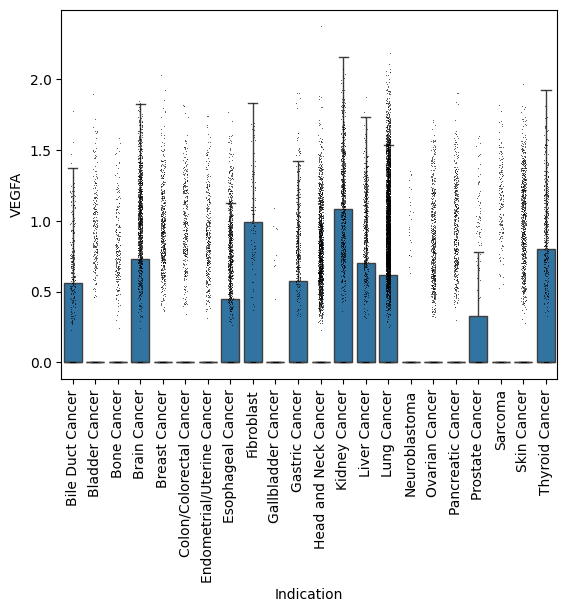

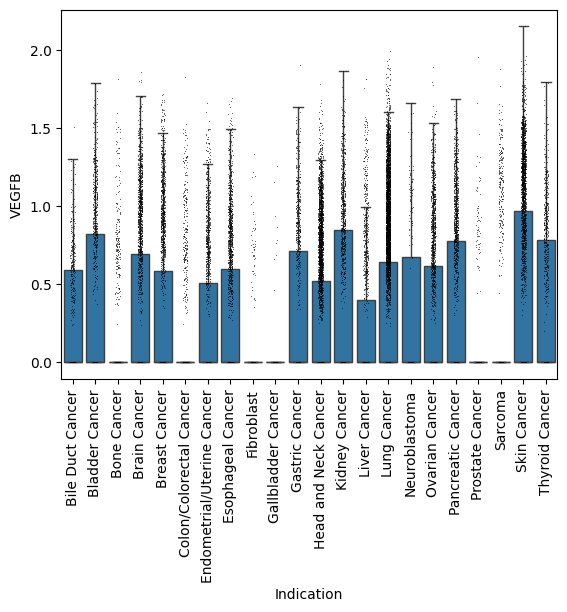

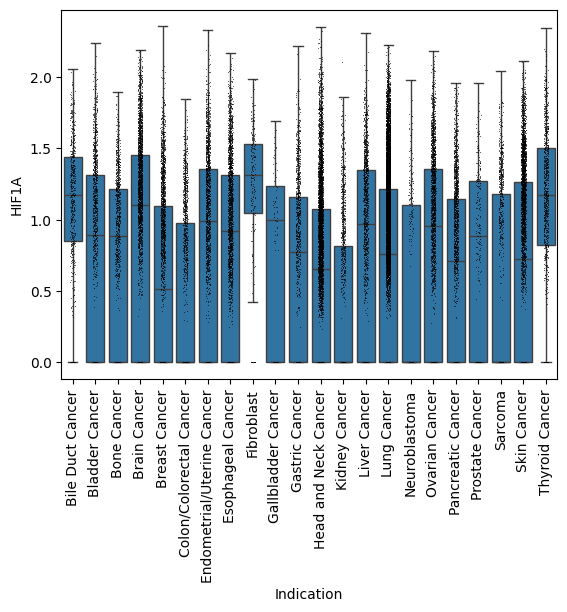

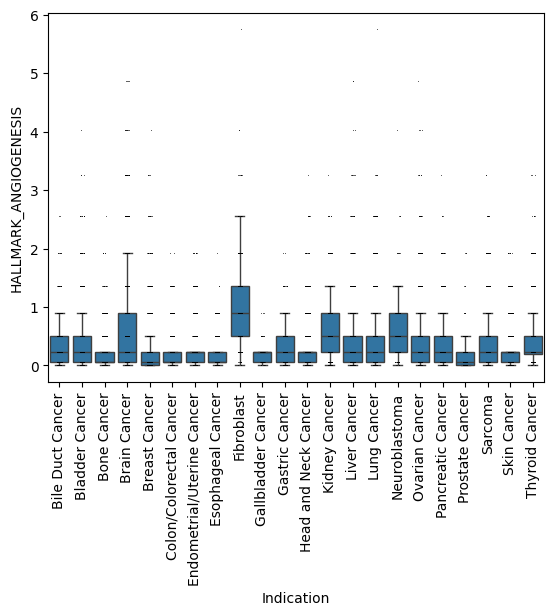

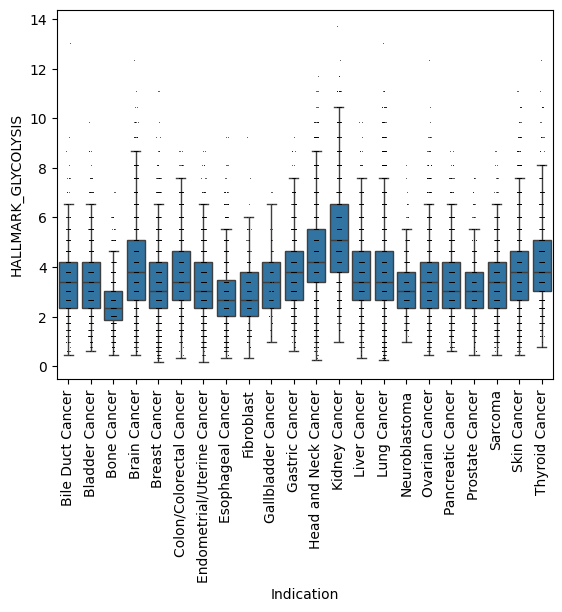

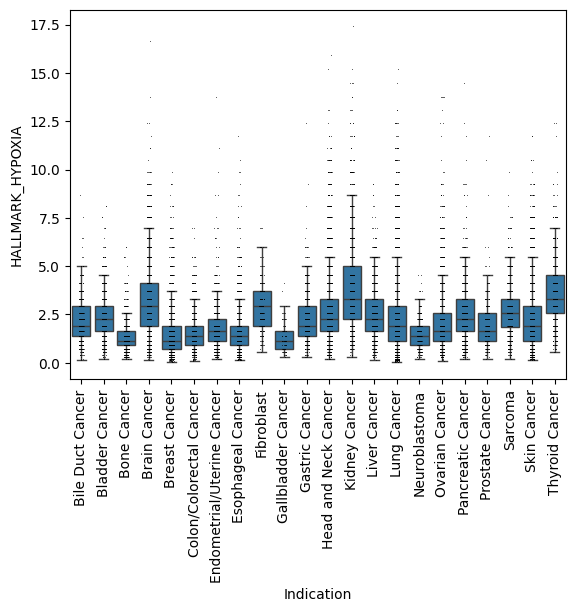

In [ ]:
for col in df.columns:
  if col!="Indication":
    x = sns.boxplot(
      data=df,
      x='Indication',
      y=col,
      showfliers=False,
      )

    x = sns.stripplot(
      data=df,
      x='Indication',
      y=col,
      color='black',
      size=0.5,
      jitter=True,
      )
    x.tick_params(axis='x', labelrotation=90)
    plt.show()

According to these results, fibroblast and thyroid cancer seem to have higher angiogenesis and hypoxia-related gene expression and therefore we can consider them for further analysis of potential Bevacizumab repurposing.

In [ ]:
adata.write("/ya.yaghooti@gmail.com/MyDrive/F1L_compbio_internship/outs/240701_kinker_anndata_preprocessed_with_clustering_and_decouplr.h5ad")